# Groupe 4 :   

Conet Brieuc (1118 1800)   
Deside Guillaume (3973 1800)   
Loffet Alexandre (5470 1700)   



<font size=6  color=#003366> <div style="text-align: center"> [LGBIO2050] - Medical Imaging <br><br> 
<div style="text-align: center"> Edge Detection  </font> <br><br><br>

<font size=5  color=#003366>
<div style="text-align: left"> Professors :   
<font size=4  color=#003366>
<div style="text-align: left"> Prof. G. Kerckhofs  
<div style="text-align: left"> Prof. J. Lee <br>
<div style="text-align: left"> Prof. B. Macq <br>
<div style="text-align: left"> Prof. F. Peeters
<font size=5  color=#003366>
    
<br> <br>
<div style="text-align: left"> Teaching assistants : 
<font size=4  color=#003366>
<div style="text-align: left"> Damien Dasnoy-Sumell (damien.dasnoy@uclouvain.be)<br> 
<div style="text-align: left">Estelle Loÿen (estelle.loyen@uclouvain.be)
<font size=5  color=#003366>
<div style="text-align: right"> 2021-2022 </div>
<br><br>
</font>

<font size=6 color=#009999> 1. Guidelines and Deliverables </font> <br> 
   - This assignment is due on **November 4th**.
   - Copying code or answers from other groups (or from the internet) is strictly forbidden. Each source of inspiration must be clearly indicated.
   - The jupyter notebook containing the code and **detailed answers** to the questions must be delivered in an
archive (.zip folder) on Moodle. The answers have to be written in English.<br> <br>

<font size=6 color=#009999> 2. Context and objective </font> <br> <br>

<div style="text-align: justify"> Anatomical structure segmentation on images is an important part of many medical applications. It is a process difficult to automate and it can be very time consuming if done manually. Edge detection, also called border detection, can sometimes be used in a segmentation pipeline. For this project, you will understand and implement a famous automatic edge detector called the "Canny edge detector". It is composed of the following 5 steps: <br> <br>

<div style="text-align: justify"> 1. Noise reduction: reduce image noise by using a simple gaussian filter to smooth the image. You can use one already implemented. <br><br>

<div style="text-align: justify"> 2. Compute image gradient intensity and direction: implement a function to compute the image gradient in both direction using Sobel operator. These images can then be combined to compute the norm and the slope direction of the gradient.
    
$$ |G| = \sqrt{G_{x}^{2}+G_{y}^{2}} $$ 
 
$$ \theta (x,y) = arctan(\frac{G_{y}}{G_{x}}) $$ <br><br>


<div style="text-align: justify"> 3.	Edge thinning: the next step is to reduce the borders thickness. You can use the function ’thinning’ given by the assistant in the template to do this step. <br> <br>

<div style="text-align: justify"> 4.	Double thresholding: the double threshold step aims at separating borders into 2 classes, strong borders when the intensity is above the strong threshold and weak borders when the intensity is between the weak threshold and the strong threshold, the rest of the pixels can be put to a background value of 0. You can use for example as strong and weak threshold 10% and 5% of the max value of the image respectively. <br> <br>
 
<div style="text-align: justify"> 5.	Weak borders evaluation: based on the threshold results, the last step consists of sorting the weak borders into strong borders or background. Weak borders must be transformed to strong ones if at least one of the pixels around the one being processed is a strong border. If not, a weak border joins the dark side. <br> <br>

The 3 following images are available to test your Canny edge detector implementation.
    

![Capture%20d%E2%80%99e%CC%81cran%202021-09-14%20a%CC%80%2015.04.25.png](attachment:Capture%20d%E2%80%99e%CC%81cran%202021-09-14%20a%CC%80%2015.04.25.png)

<font size=6 color=#009999> 3. Canny Edge Detector </font> <br> <br>

<div class="alert alert-info">
<b>QUESTION 1</b>  <br>
Implement a Canny Edge Detector using the 5 steps described above. 

In [ ]:
# The use of the 'thinning' function will be required

def thinning(img, angles):

    """
    :param img: The image on which the edges have to be thinned.
    :param angles: An angle image of the same size as img, which contain the direction of the gradient slope of img on each point as angles in radians
    :return: a thinned img
    """

    M, N = img.shape
    Z = np.zeros((M, N), dtype=np.int32)
    angle = angles * 180. / np.pi
    angle[angle < 0] += 180

    for i in range(1, M - 1):
        for j in range(1, N - 1):
            try:
                q = 255
                r = 255

                # angle 0
                if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                    q = img[i, j + 1]
                    r = img[i, j - 1]
                # angle 45
                elif (22.5 <= angle[i, j] < 67.5):
                    q = img[i + 1, j - 1]
                    r = img[i - 1, j + 1]
                # angle 90
                elif (67.5 <= angle[i, j] < 112.5):
                    q = img[i + 1, j]
                    r = img[i - 1, j]
                # angle 135
                elif (112.5 <= angle[i, j] < 157.5):
                    q = img[i - 1, j - 1]
                    r = img[i + 1, j + 1]

                if (img[i, j] >= q) and (img[i, j] >= r):
                    Z[i, j] = img[i, j]
                else:
                    Z[i, j] = 0

            except IndexError as e:
                pass

    return Z



In [ ]:
#import packages
from scipy.ndimage import convolve, gaussian_filter
from scipy.ndimage import filters
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray

In [ ]:
#import images
imgl = imread('imgs/CT_Lung.jpg')[:, :, 0].astype(np.float64)
imgp = imread('imgs/CT_Pregnancy.jpg')[:, :, 0].astype(np.float64)
imgb = imread('imgs/MRI_Brain.jpg').astype(np.float64)

#1 Noise reduction 
imglFilt = gaussian_filter(imgl,1.15) 
imgpFilt = gaussian_filter(imgp,1.15)
imgbFilt = gaussian_filter(imgb,1.15)


In [ ]:
#Canny edge detector
def edge_detector(image,high_threshold,low_threshold):
    #2 Image gradient intensity and direction
    
    #Inititation of Sobel matrices 
    sobelx = np.ones((3,1))
    sobelx[1,0] = 2
    sobely = (sobelx @ [[1, 0, -1]]).T
    sobelx = sobelx @ [[-1, 0, 1]]

    #Computation of image gradient
    G_x = convolve(image,sobelx,mode='constant',cval=0.0)
    G_y = convolve(image,sobely,mode='constant',cval=0.0)
    
    G_norm = np.sqrt( G_x**2 + G_y**2) 
    G_sd = np.arctan2(G_y,G_x) 
    
    #Normalization
    G_norm = G_norm *255/np.ndarray.max(G_norm) 
    
    #3 Edge thinning
    image_thin = thinning(G_norm, G_sd) 
    
    #4 Double thresholding
    max_value = np.ndarray.max(image_thin)
    t_weak = low_threshold *max_value
    t_strong = high_threshold *max_value
    thres_image = np.where(image_thin > t_weak,image_thin,0)
    
    bol_weakB = (thres_image>t_weak) & (thres_image<t_strong)
    bol_strongB = (thres_image>t_strong)
    B2B = np.copy(bol_strongB)
    
    
    #5 Classification of 'intermediate' border
    image_y,image_x = np.shape(image)
    
    for i in range(1,image_y-1):
        for j in range(1,image_x-1):
            if (bol_weakB[i,j]):
                if (np.any(bol_strongB[i-1:i+1,j-1:j+1])):
                    B2B[i,j]=True 
                    
    final_image = B2B * thres_image
    weak_borders = image_thin-thres_image #Gives what is rejected at step 4
    #weak_borders_all = image_thin-final_image #Every edges that are rejected from the image
    #weak_borders5_10 = final_image-weak_borders # Gives what is rejected at step 5 (weak borders between 5-10 percents)
    return final_image, G_norm, G_sd,image_thin, weak_borders


imgl_edge,imgl_norm,imgl_slope_direction,imgl_after_thin,weakB_lung  = edge_detector(imgl,1/10,5/100)
imgp_edge,imgp_norm,imgp_slope_direction,imgp_after_thin,weakB_preg = edge_detector(imgp,15/100,7/100)
imgb_edge,imgb_norm,imgb_slope_direction,imgb_after_thin,weakB_brain  = edge_detector(imgb,12/100,6/100)


<div class="alert alert-info">
<b>QUESTION 2</b>  <br>
Show and comment the result after each step of the pipeline.

# Steps of edge detection for the lung CT image

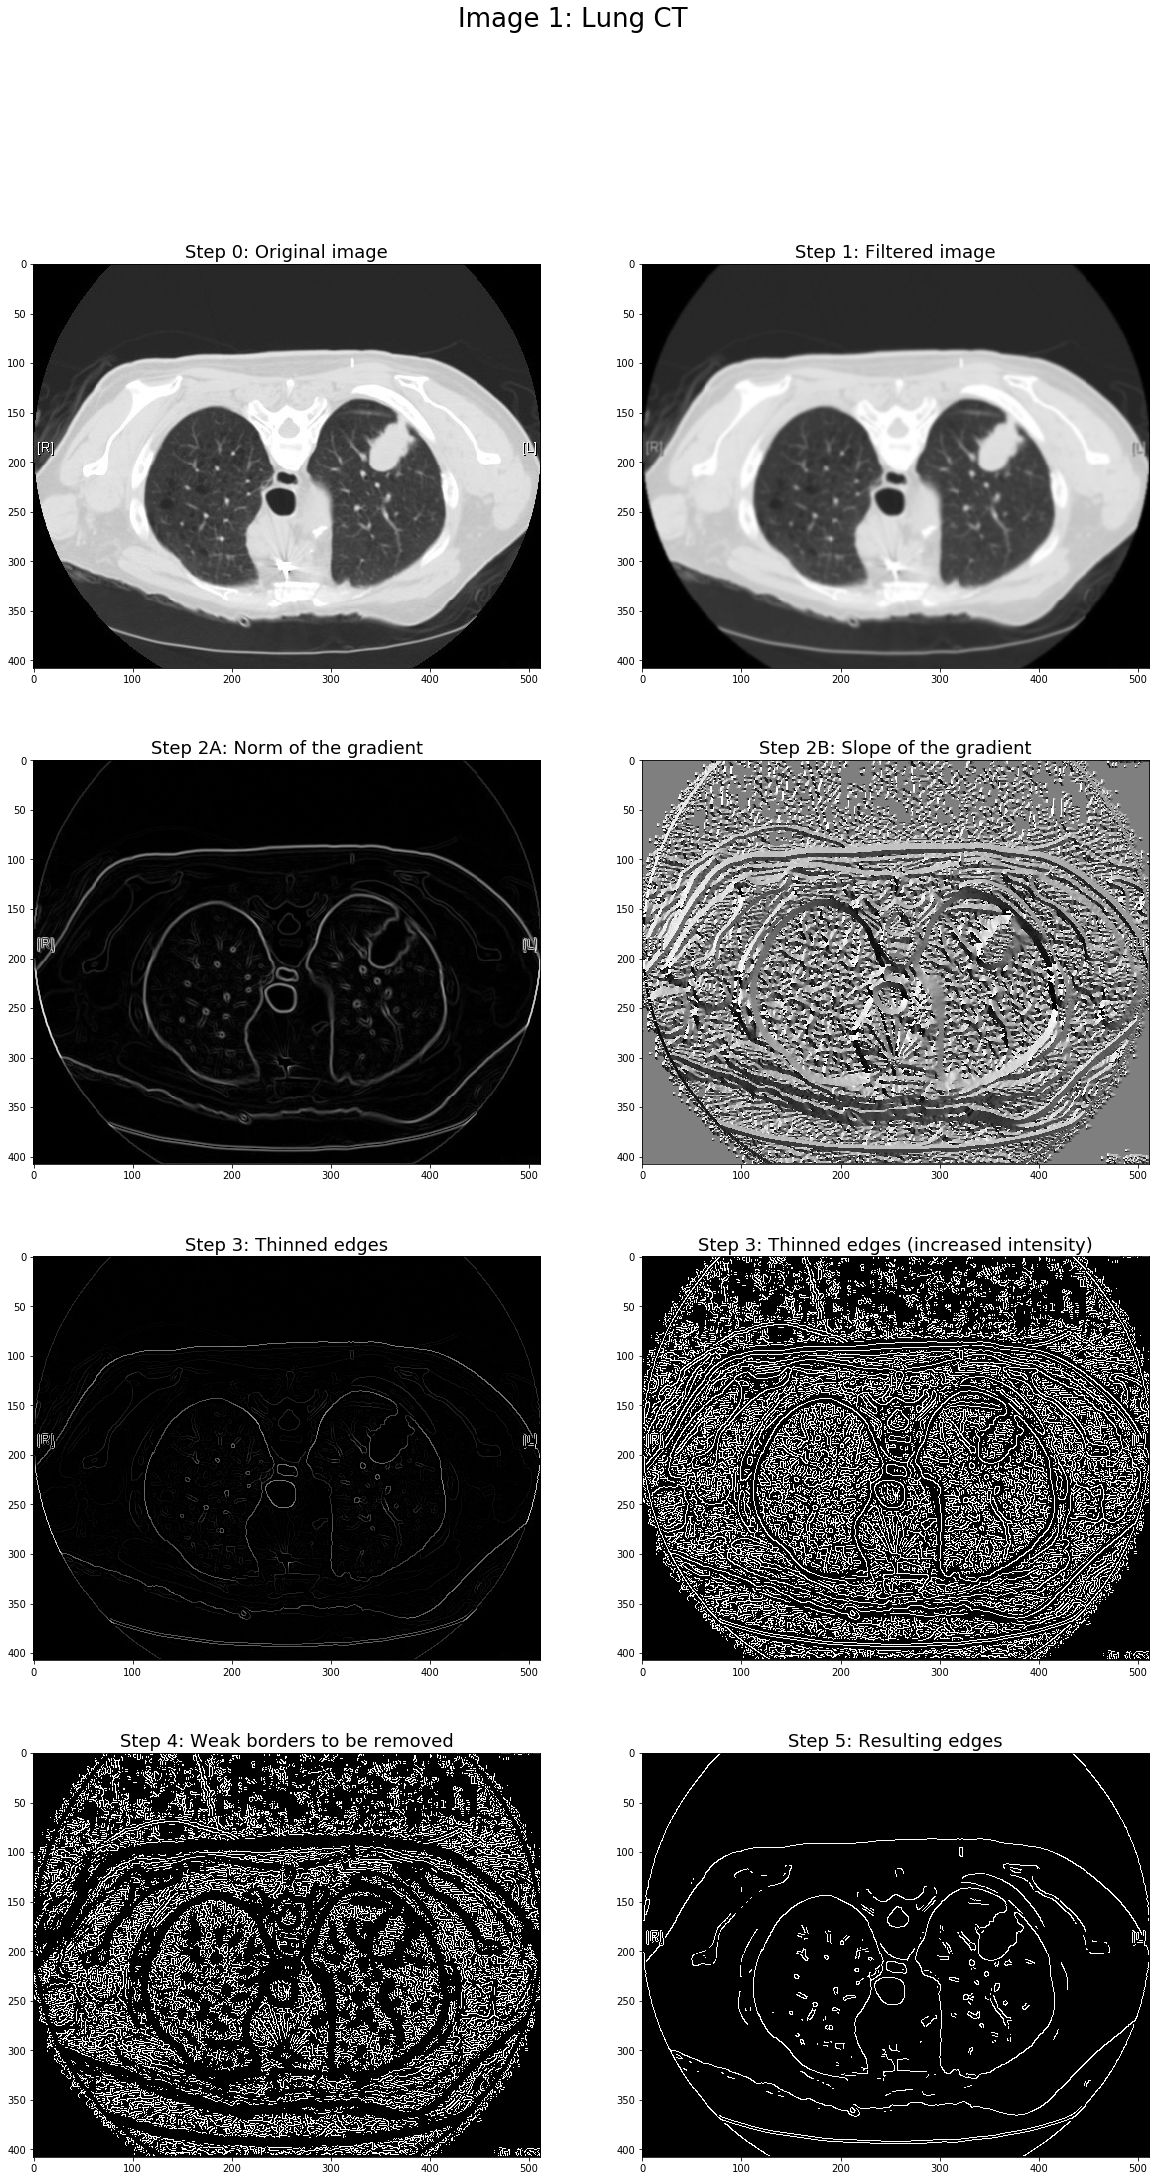

In [ ]:
fig, axes = plt.subplots(4,2)   
fig.set_size_inches(20,35)
fig.suptitle("Image 1: Lung CT",fontsize=26)

axes[0][0].imshow(imgl,cmap='gray')
axes[0][0].set_title('Step 0: Original image',fontsize=18)
axes[0][1].imshow(imglFilt,cmap='gray')
axes[0][1].set_title('Step 1: Filtered image',fontsize=18)

axes[1][0].imshow(imgl_norm,cmap='gray')
axes[1][0].set_title('Step 2A: Norm of the gradient',fontsize=18)
axes[1][1].imshow(imgl_slope_direction,cmap='gray')
axes[1][1].set_title('Step 2B: Slope of the gradient',fontsize=18)

axes[2][0].imshow(imgl_after_thin,cmap='gray')
axes[2][0].set_title('Step 3: Thinned edges',fontsize=18)
axes[2][1].imshow(np.where(imgl_after_thin>0,255,0),cmap='gray')
axes[2][1].set_title('Step 3: Thinned edges (increased intensity)',fontsize=18)


axes[3][0].imshow(np.where(weakB_lung>0,255,0),cmap='gray')
axes[3][0].set_title('Step 4: Weak borders to be removed',fontsize=18)
axes[3][1].imshow(np.where(imgl_edge>0,255,0),cmap='gray')
axes[3][1].set_title('Step 5: Resulting edges',fontsize=18)
plt.show() 

# Comments on the steps of the pipeline

- STEP 1: 

During the first step the image is filtered reducing noise. In fact, the image is a bit blurred which avoid having sudden change in intensity due to noise. This is useful because in the next step, in order to determine the edges present in the image, we will detect sudden change in intensity that could indicate borders. Therefore, this first step allows to reduce possible confusion between noise and potential border. 

- STEP 2:

The second step uses a convolution between the images and Sobel matrices. This convolution allows to obtain the intensity gradient of the image. From the intensity gradient we can compute and plot the gradient's norm (2A) and the gradient's slope (2B). We know that the more the value of the gradient is big the more there is a change in intensity in the original image thus we localized the potential borders.

- STEP 3: 

For the third step we used the 'thinning' function which is further explained at question 3. The aim of the function is, as its name indicates, to thin the borders. We can see on the left plot (Step 3: thinned edges) that the width of the borders is reduced to one pixel. To make it more visual, we increased the intensity of all pixels that were not 0 (black) to better illustrate the changes in the next steps (see right plot at Step 3).

- STEP 4 and 5:

In the end, we segregated the borders between 'strong' (high intensity gradient) and 'weak' (low intensity gradient) borders. Weak borders meaning small variation of pixel intensity are subtracted to the edges image because they do not reflect interesting borders. We defined as weak borders pixels that had an intensity bellow 5 percent of the maximum intensity pixel in the image. Those pixels are visible in the plot above. We then sorted the pixels having an intensity between 10 and 5 percent (of the maximum intensity pixel in the image) in the step 5. To do so, we checked if every pixel belonging to 'middle' border had a 'strong' border neighbor pixel in which case it was categorized as strong, otherwise as weak. We can see on the last image the final result with all the weak borders removed.

# Other images

We followed the same steps to find the edges for the others images, we only changed the threshold to define the 'weak' and 'strong' borders in order to obtain more visual results.


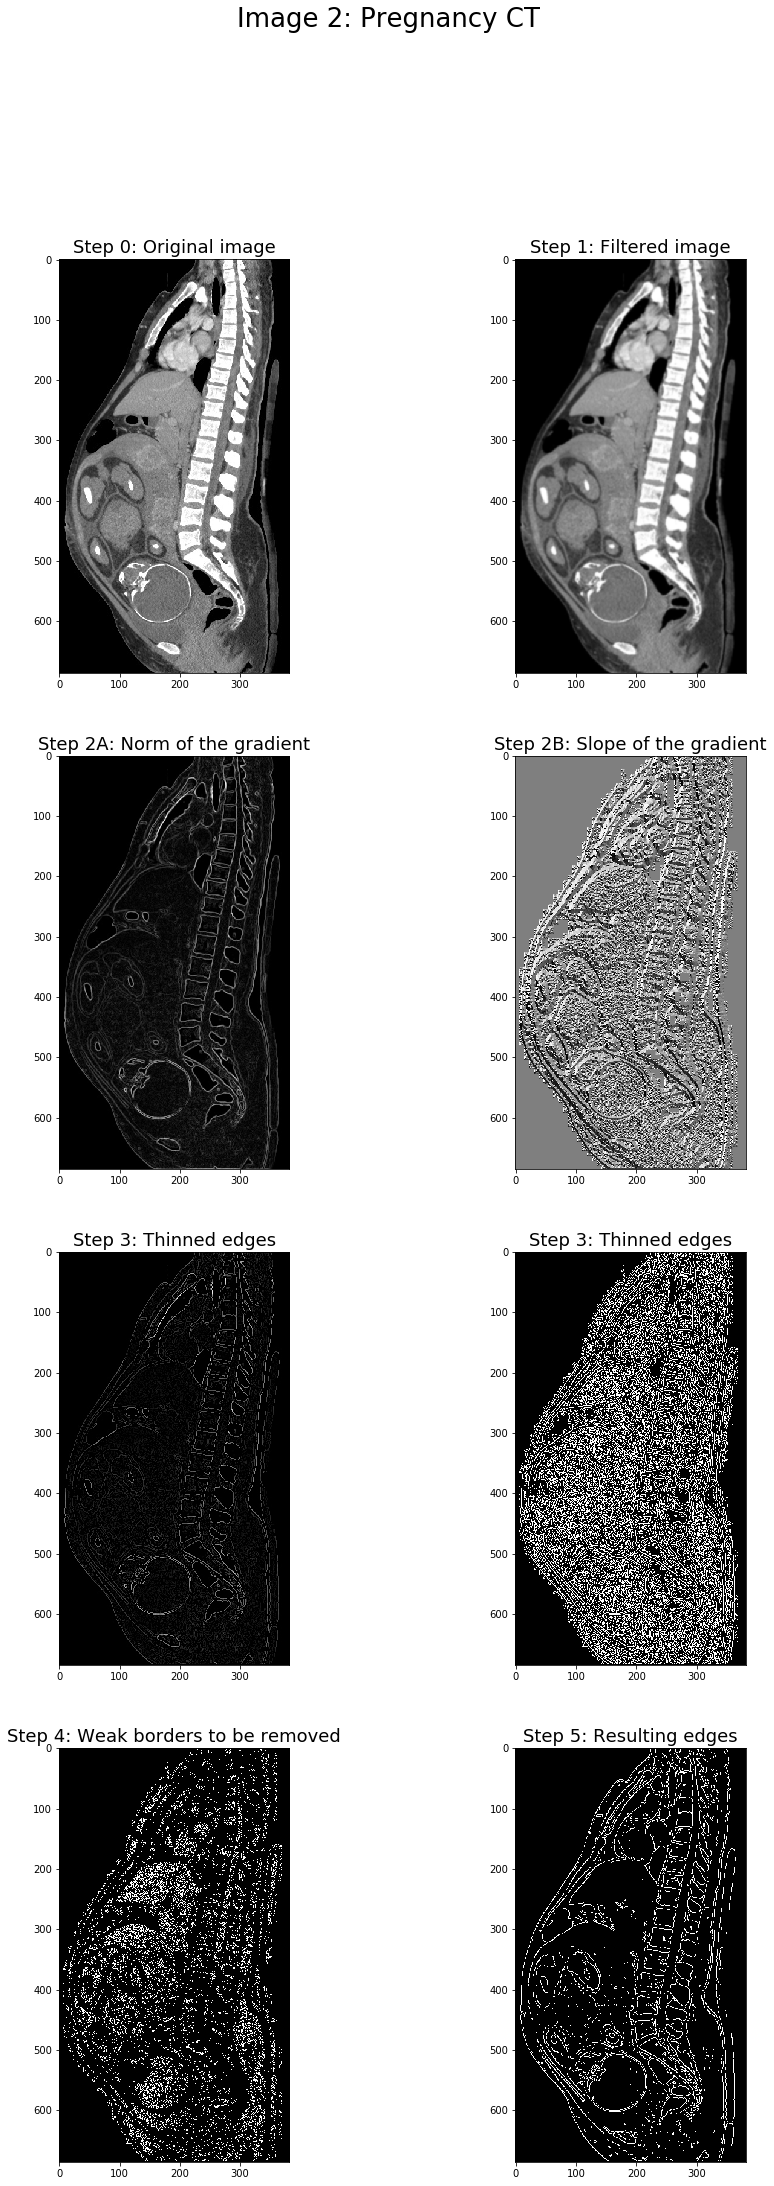

In [ ]:
fig, axes = plt.subplots(4,2)   
fig.set_size_inches(15,35)
fig.suptitle("Image 2: Pregnancy CT",fontsize=26)

axes[0][0].imshow(imgp,cmap='gray')
axes[0][0].set_title('Step 0: Original image',fontsize=18)
axes[0][1].imshow(imgpFilt,cmap='gray')
axes[0][1].set_title('Step 1: Filtered image',fontsize=18)

axes[1][0].imshow(imgp_norm,cmap='gray')
axes[1][0].set_title('Step 2A: Norm of the gradient',fontsize=18)
axes[1][1].imshow(imgp_slope_direction,cmap='gray')
axes[1][1].set_title('Step 2B: Slope of the gradient',fontsize=18)

axes[2][0].imshow(imgp_after_thin,cmap='gray')
axes[2][0].set_title('Step 3: Thinned edges',fontsize=18)
axes[2][1].imshow(np.where(imgp_after_thin>0,255,0),cmap='gray')
axes[2][1].set_title('Step 3: Thinned edges',fontsize=18)


axes[3][0].imshow(np.where(weakB_preg>0,255,0),cmap='gray')
axes[3][0].set_title('Step 4: Weak borders to be removed',fontsize=18)
axes[3][1].imshow(np.where(imgp_edge>0,255,0),cmap='gray')
axes[3][1].set_title('Step 5: Resulting edges',fontsize=18)
plt.show() 

For the pregnancy CT image we used a weak threshold of 7/100 and a strong threshold of 15/100.

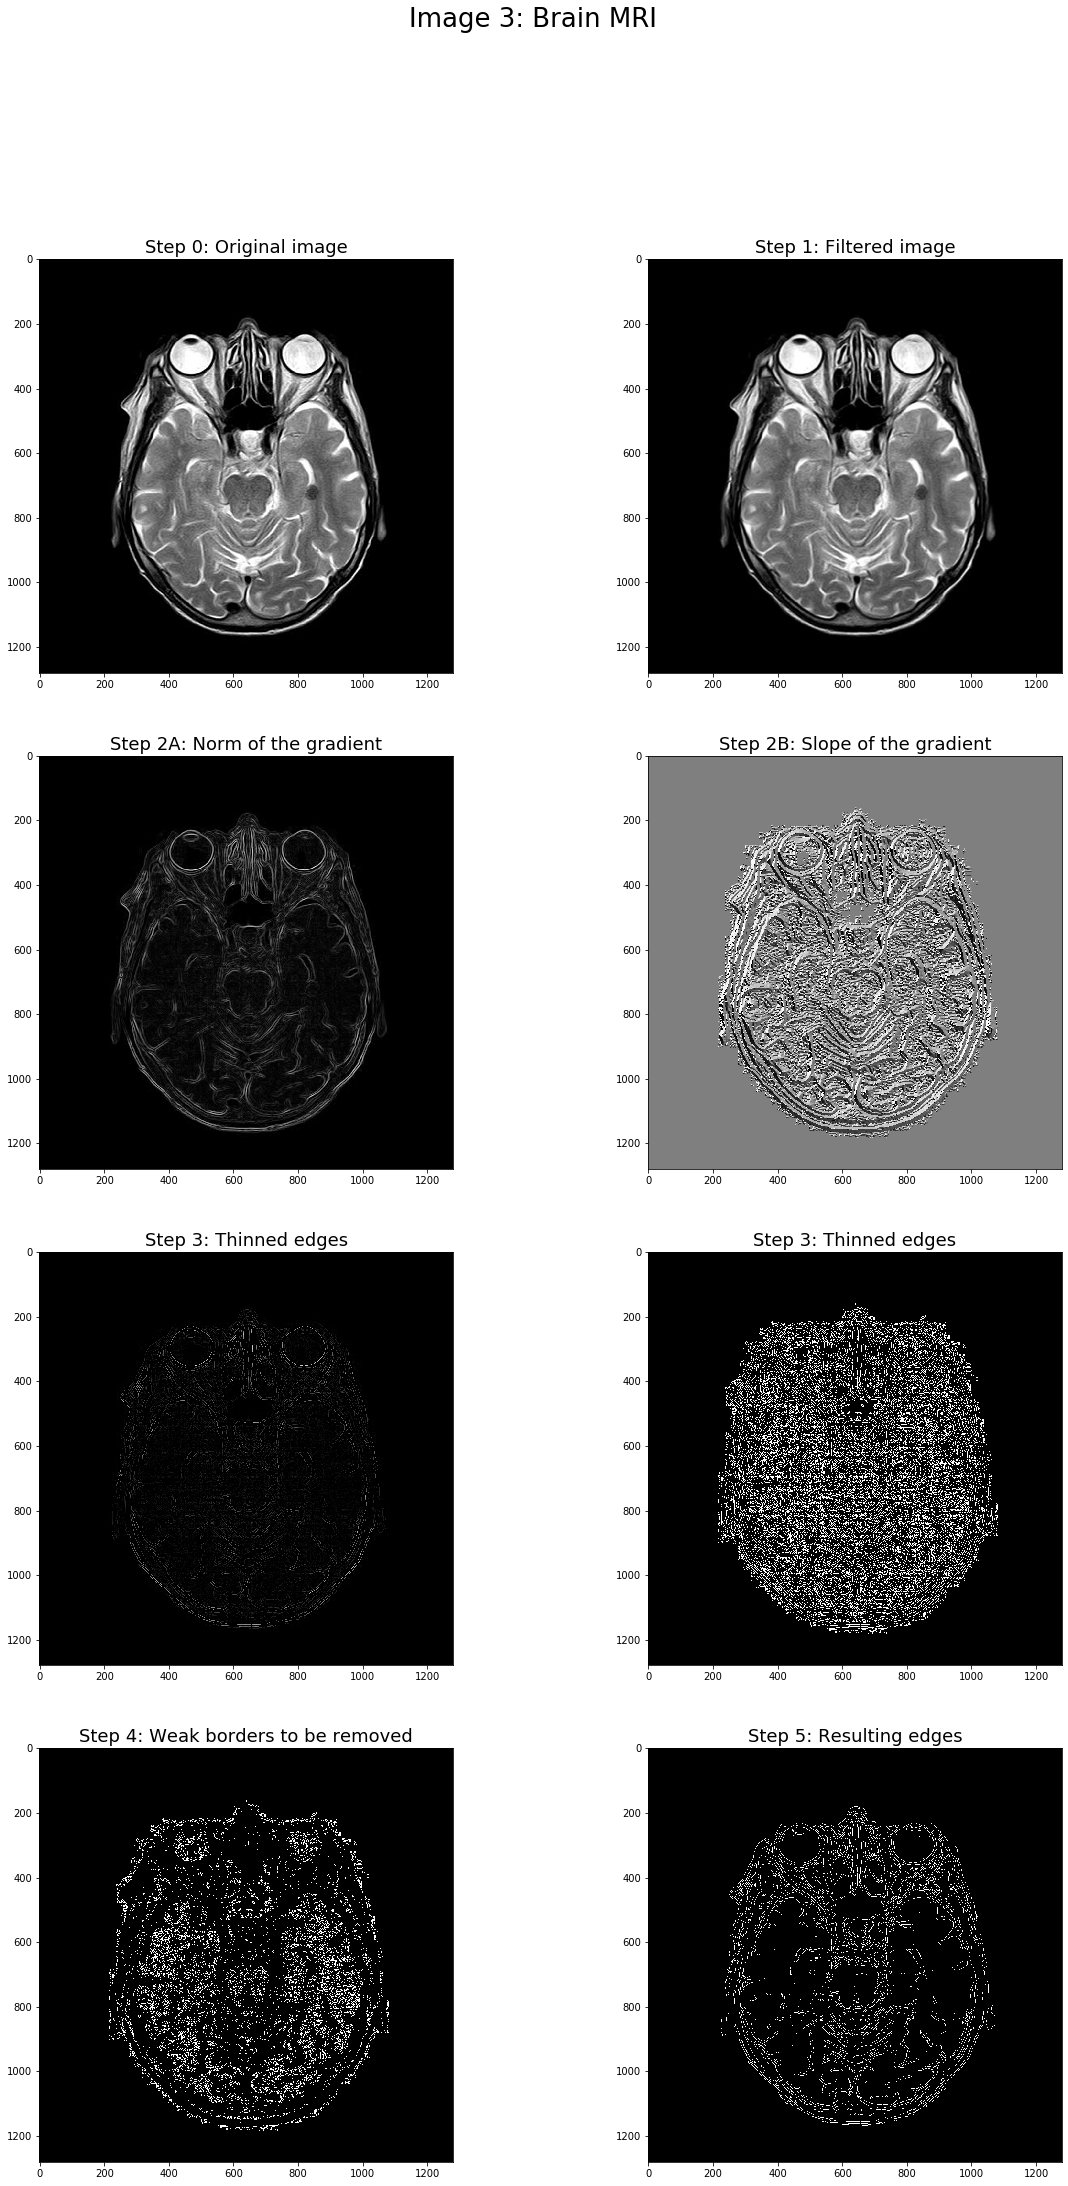

In [ ]:
fig, axes = plt.subplots(4,2)   
fig.set_size_inches(20,35)
fig.suptitle("Image 3: Brain MRI",fontsize=26)

axes[0][0].imshow(imgb,cmap='gray')
axes[0][0].set_title('Step 0: Original image',fontsize=18)
axes[0][1].imshow(imgbFilt,cmap='gray')
axes[0][1].set_title('Step 1: Filtered image',fontsize=18)

axes[1][0].imshow(imgb_norm,cmap='gray')
axes[1][0].set_title('Step 2A: Norm of the gradient',fontsize=18)
axes[1][1].imshow(imgb_slope_direction,cmap='gray')
axes[1][1].set_title('Step 2B: Slope of the gradient',fontsize=18)

axes[2][0].imshow(imgb_after_thin,cmap='gray')
axes[2][0].set_title('Step 3: Thinned edges',fontsize=18)
axes[2][1].imshow(np.where(imgb_after_thin>0,255,0),cmap='gray')
axes[2][1].set_title('Step 3: Thinned edges',fontsize=18)


axes[3][0].imshow(np.where(weakB_brain>0,255,0),cmap='gray')
axes[3][0].set_title('Step 4: Weak borders to be removed',fontsize=18)
axes[3][1].imshow(np.where(imgb_edge>0,255,0),cmap='gray')
axes[3][1].set_title('Step 5: Resulting edges',fontsize=18)
plt.show()  

For the brain MRI image we used a weak threshold of 6/100 and a strong threshold of 12/100.

<div class="alert alert-info">
<b>QUESTION 3</b>  <br>
Explain how the "thinning" function works for the step 3. 

The thinning function watch every pixel and its eight neighbors. The function analyzes the pixel and its two neighboring pixels in every possible direction (0° ,45°,90°, 135°) and observe which pixel is more intense (whiter). In the case where the central pixel has not the biggest intensity it will be set to zero. In other case, it keeps its initial value. Therefore, after the application of this function on direction of gradient slope, it will only remain the top of the crests. 

<div class="alert alert-info">
<b>QUESTION BONUS</b>  <br>
Show the resulting borders in color on top of the original images. 

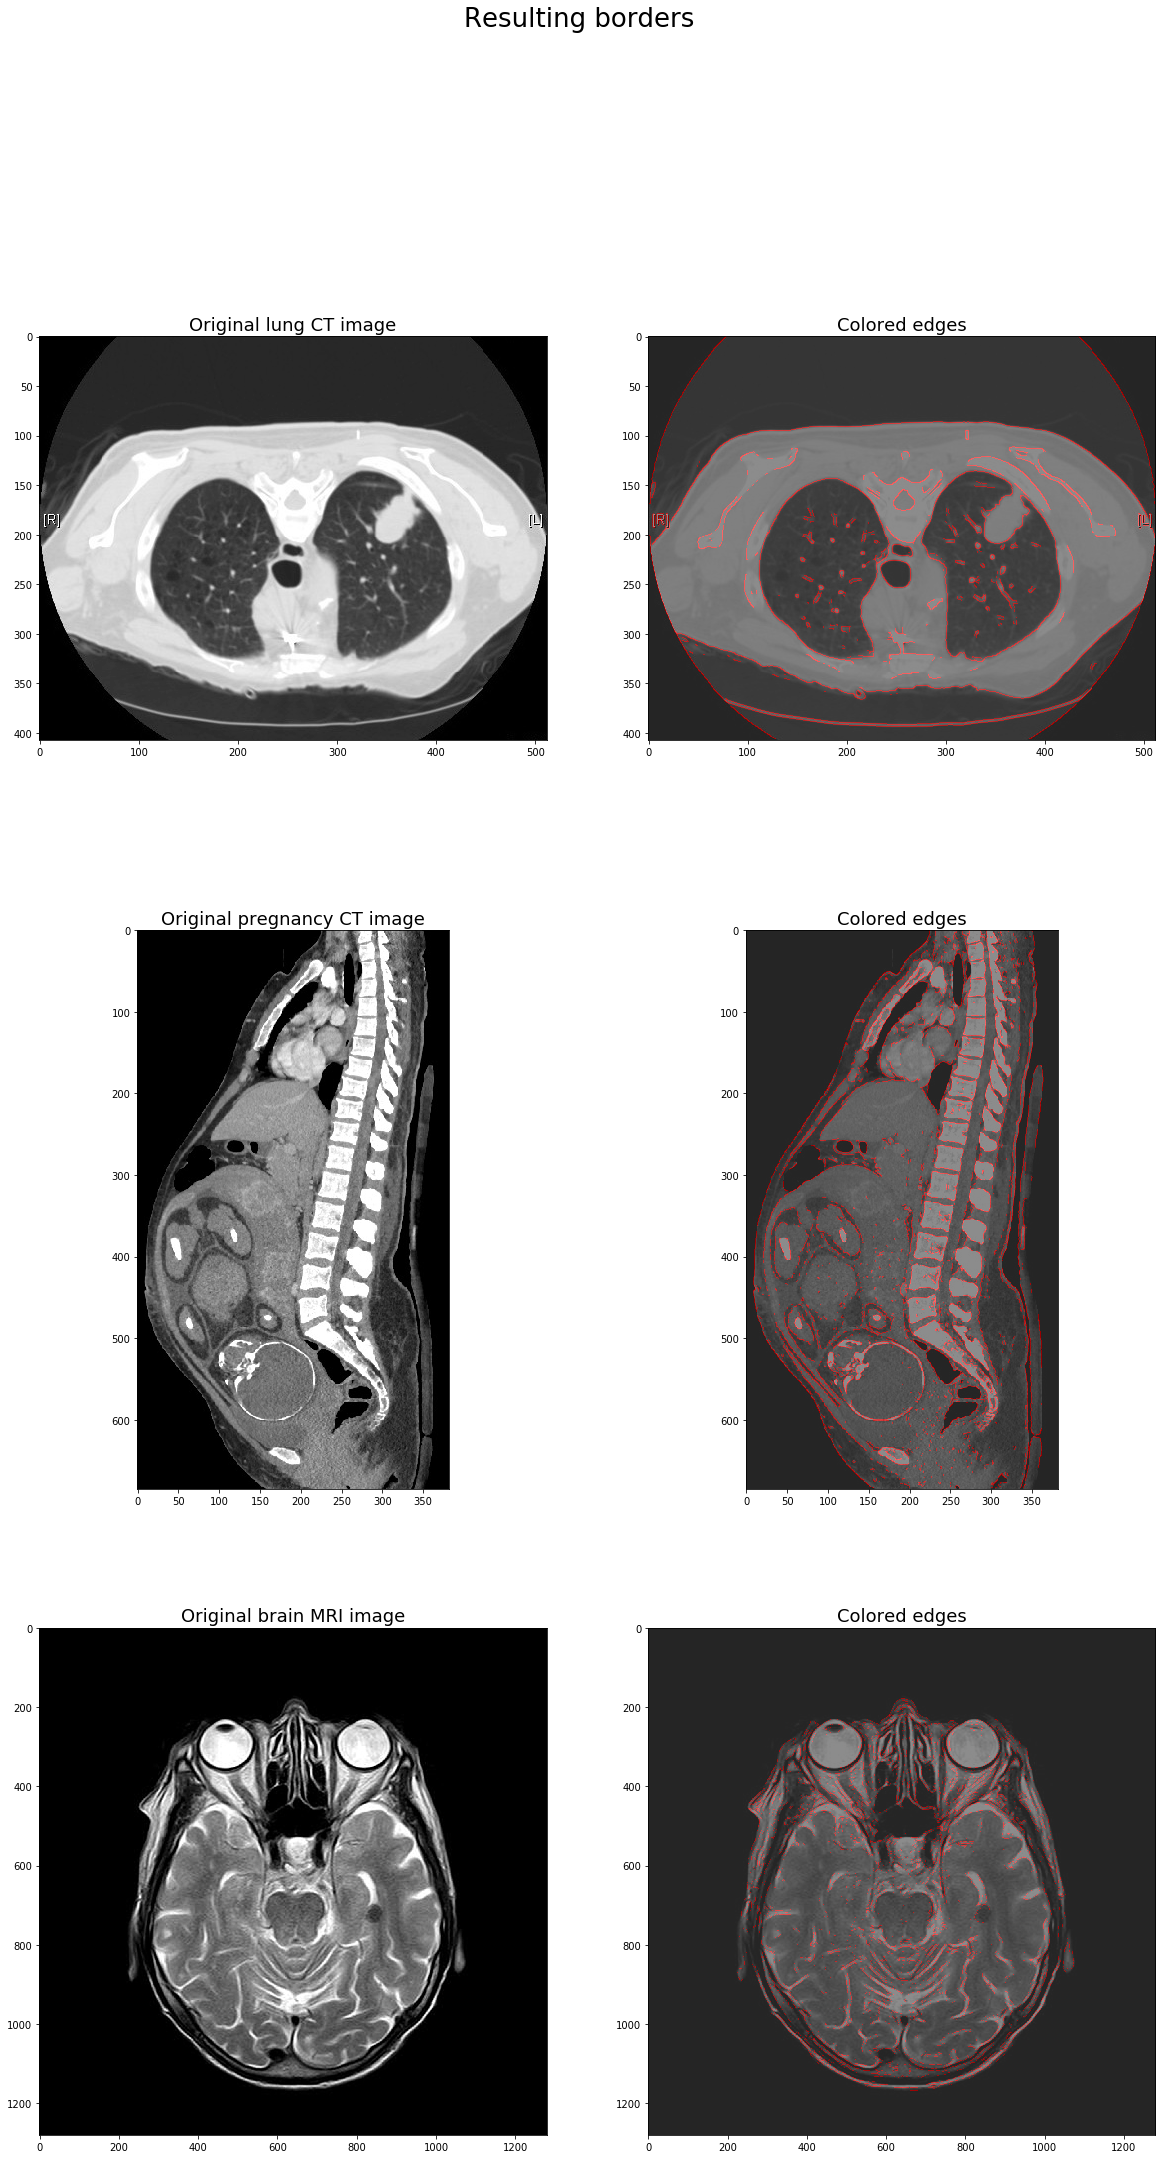

In [ ]:
def colorIm(edges):
    x,y=np.shape(edges)
    bol= edges>0
    col_edge= np.ones((x,y,3))*0.25
    for i in range(0,y-1):
        for j in range(0,x-1):
            if (bol[j,i]):
                col_edge[j,i,0]=1
                col_edge[j,i,1]=0
                col_edge[j,i,2]=0
    return col_edge

color_imgl = colorIm(imgl_edge)
color_imgp = colorIm(imgp_edge)
color_imgb = colorIm(imgb_edge)

fig, axes = plt.subplots(3,2)   
fig.set_size_inches(20,35)
fig.suptitle("Resulting borders",fontsize=26)

axes[0][0].imshow(imgl,cmap='gray')
axes[0][0].set_title('Original lung CT image',fontsize=18)
axes[0][1].imshow(imgl,cmap='gray')
axes[0][1].imshow(color_imgl,alpha=0.6)
axes[0][1].set_title('Colored edges',fontsize=18)

axes[1][0].imshow(imgp,cmap='gray')
axes[1][0].set_title('Original pregnancy CT image',fontsize=18)
axes[1][1].imshow(imgp,cmap='gray')
axes[1][1].imshow(color_imgp,alpha=0.6)
axes[1][1].set_title('Colored edges',fontsize=18)

axes[2][0].imshow(imgb,cmap='gray')
axes[2][0].set_title('Original brain MRI image',fontsize=18)
axes[2][1].imshow(imgb,cmap='gray')
axes[2][1].imshow(color_imgb,alpha=0.6)
axes[2][1].set_title('Colored edges',fontsize=18)

plt.show()